# Exploration Of prosperLoanData 
## by Bassam Abd Elmohsen Shahat

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [40]:
dataset=pd.read_csv('prosperLoanData.csv')
dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [41]:
dataset.shape

(113937, 81)

### What is the structure of your dataset?

> the dataset contains 113937 records or loands and 81 column (informations about loans)

### What is/are the main feature(s) of interest in your dataset?

> i am interested with the features that effect either this customer  can pay off the loan or not 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'Term','LoanStatus','ProsperScore','EmploymentStatus','CreditScoreRangeLower',
'CreditScoreRangeUpper','AmountDelinquent','IncomeRange','StatedMonthlyIncome','TotalProsperLoans',
'LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment'

In [42]:
# i will keep only columns that i will use 
dataset=dataset[['Term','LoanStatus','ProsperScore','EmploymentStatus','AmountDelinquent','IncomeRange','StatedMonthlyIncome','TotalProsperLoans',
'LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment']]

In [43]:
print(dataset.shape)

(113937, 11)


In [44]:
dataset.head()

,Term,LoanStatus,ProsperScore,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,NaN,Self-employed,472.0,"$25,000-49,999",3083.333333,NaN,0,9425,330.43
1,36,Current,7.0,Employed,0.0,"$50,000-74,999",6125.000000,NaN,0,10000,318.93
2,36,Completed,NaN,Not available,NaN,Not displayed,2083.333333,NaN,0,3001,123.32
3,36,Current,9.0,Employed,10056.0,"$25,000-49,999",2875.000000,NaN,0,10000,321.45
4,36,Current,4.0,Employed,0.0,"$100,000+",9583.333333,1.0,0,15000,563.97


In [45]:
dataset.dtypes

Term                           int64
LoanStatus                    object
ProsperScore                 float64
EmploymentStatus              object
AmountDelinquent             float64
IncomeRange                   object
StatedMonthlyIncome          float64
TotalProsperLoans            float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
dtype: object

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [46]:
# define a function to visualize a bar chart
def barchart(string_inp,vert_or_horiz):
    base_color=sb.color_palette()[0]
    if(vert_or_horiz=="vertical"):
        sb.countplot(data=dataset,x=string_inp,color=base_color)
    elif(vert_or_horiz=="horizontal"): 
        sb.countplot(data=dataset,y=string_inp,color=base_color)

Text(0.5, 1.0, 'Term distribution')

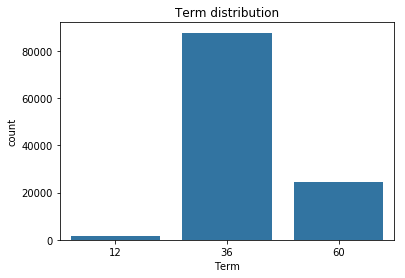

In [47]:
#visualize the term distribution
barchart('Term','vertical')
plt.title('Term distribution')

> from term distribution length of the loan here is obvious that the majority of customers 
(Customers who pay installments 36 months)

Text(0.5, 1.0, 'LoanStatus distribution')

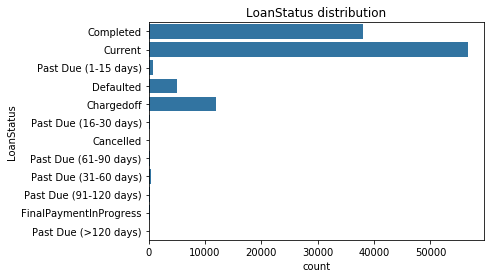

In [48]:
#visualize the LoanStatus distribution 
barchart('LoanStatus','horizontal')
plt.title('LoanStatus distribution')

> from LoanStatus distribution it is obvious that most of loans are current and there is a big percentage 
that completed and there is about 13000 chargeoff and about 5000 defaulted 

Text(0.5, 1.0, 'ProsperScore distribution')

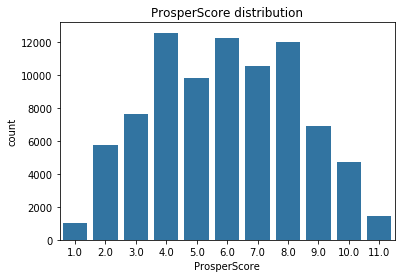

In [49]:
#from visualizing ProsperScore distribution 
barchart('ProsperScore','vertical')
plt.title('ProsperScore distribution')

> i can see that it is looked like normal distribution that means there is many scores 
in the middile and if we go left or right we see less people and there is many customers have scores (4, 6, 8) 

Text(0.5, 1.0, 'EmploymentStatus distribution')

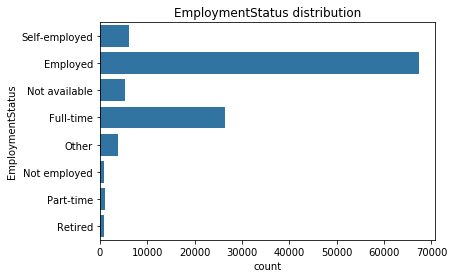

In [50]:
#from visualizing EmploymentStatus 
barchart('EmploymentStatus','horizontal')
plt.title('EmploymentStatus distribution')

> we see that most of customers employed

Text(0.5, 1.0, 'IncomeRange distribution')

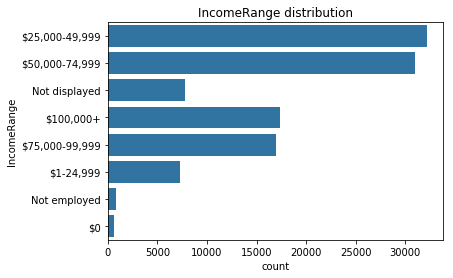

In [51]:
# visualizing IncomeRange                  
barchart('IncomeRange','horizontal')
plt.title('IncomeRange distribution')

> we notice that most of customers that took loans have income 25,000 to 74,999  

Text(0.5, 1.0, 'EmploymentStatus distribution')

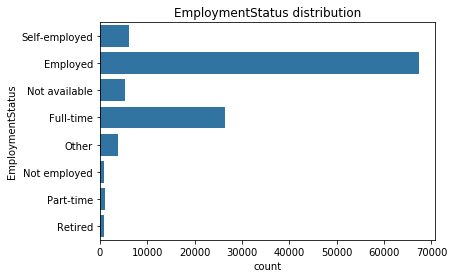

In [52]:
# visualizing EmploymentStatus 
barchart('EmploymentStatus','horizontal')
plt.title('EmploymentStatus distribution')

> most of customers are employed or fulltime (for me employed or full time i 
can combine them)

In [53]:
dataset['EmploymentStatus'].replace('Full-time', 'Employed',inplace=True)

Text(0.5, 1.0, 'EmploymentStatus distribution')

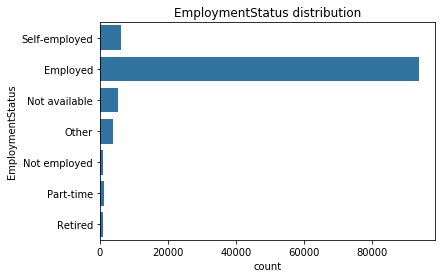

In [54]:
# visualize them again after compining
barchart('EmploymentStatus','horizontal')
plt.title('EmploymentStatus distribution')

In [55]:
# count customers with zero income
len(dataset.query('IncomeRange == "$0"'))

621

In [56]:
# count customers not employed
len(dataset.query('IncomeRange == "Not employed"'))

806

Text(0, 0.5, 'count')

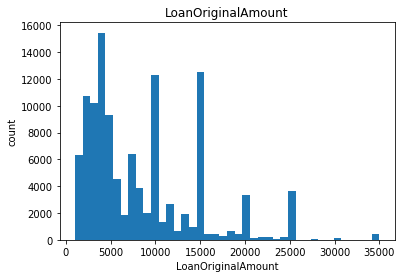

In [57]:
plt.hist(dataset['LoanOriginalAmount'], bins = 40)
plt.title('LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')

> it is like right skewed but in some values has a high values

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> from term column the majority of customers is Customers who pay installments in 36 months 

> from LoanStatus it is obvious that most of loans are current and there is a big percentage that completed and there is about > 13000 chargeoff and about 5000 defaulted 

> from EmploymentStatus most of customers employed


> from ProsperScore it is looked like normal distribution and there is many customers have scores (4, 6, 8)

> from IncomeRange we notice that most of customers that took loans have income 25,000 to 74,999                   


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there are 621 customers have zero income and 806 not employed so how the took loan 

> i think full time and employment is the same 

> i think charged off and default is the same both are loans that customers can`t pay 

In [58]:
dataset['LoanStatus'].replace('Chargedoff', 'Defaulted',inplace=True)

In [59]:
dataset['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 1.0, 'number of each LoanStatus for each Term')

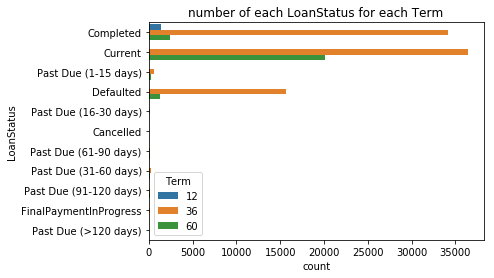

In [60]:
#visualize LoanStatus with Term
sedan_classes = ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
   'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
   'Past Due (31-60 days)', 'Past Due (91-120 days)',
   'FinalPaymentInProgress', 'Past Due (>120 days)']

# plotting
ax = sb.countplot(data = dataset, y = 'LoanStatus', hue = 'Term')
plt.title('number of each LoanStatus for each Term')

#### we can see that completed loans most of them had a term of 36 months 
#### and the same for defaulted 

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'loanoriginalamount distribution for each loanstatus')

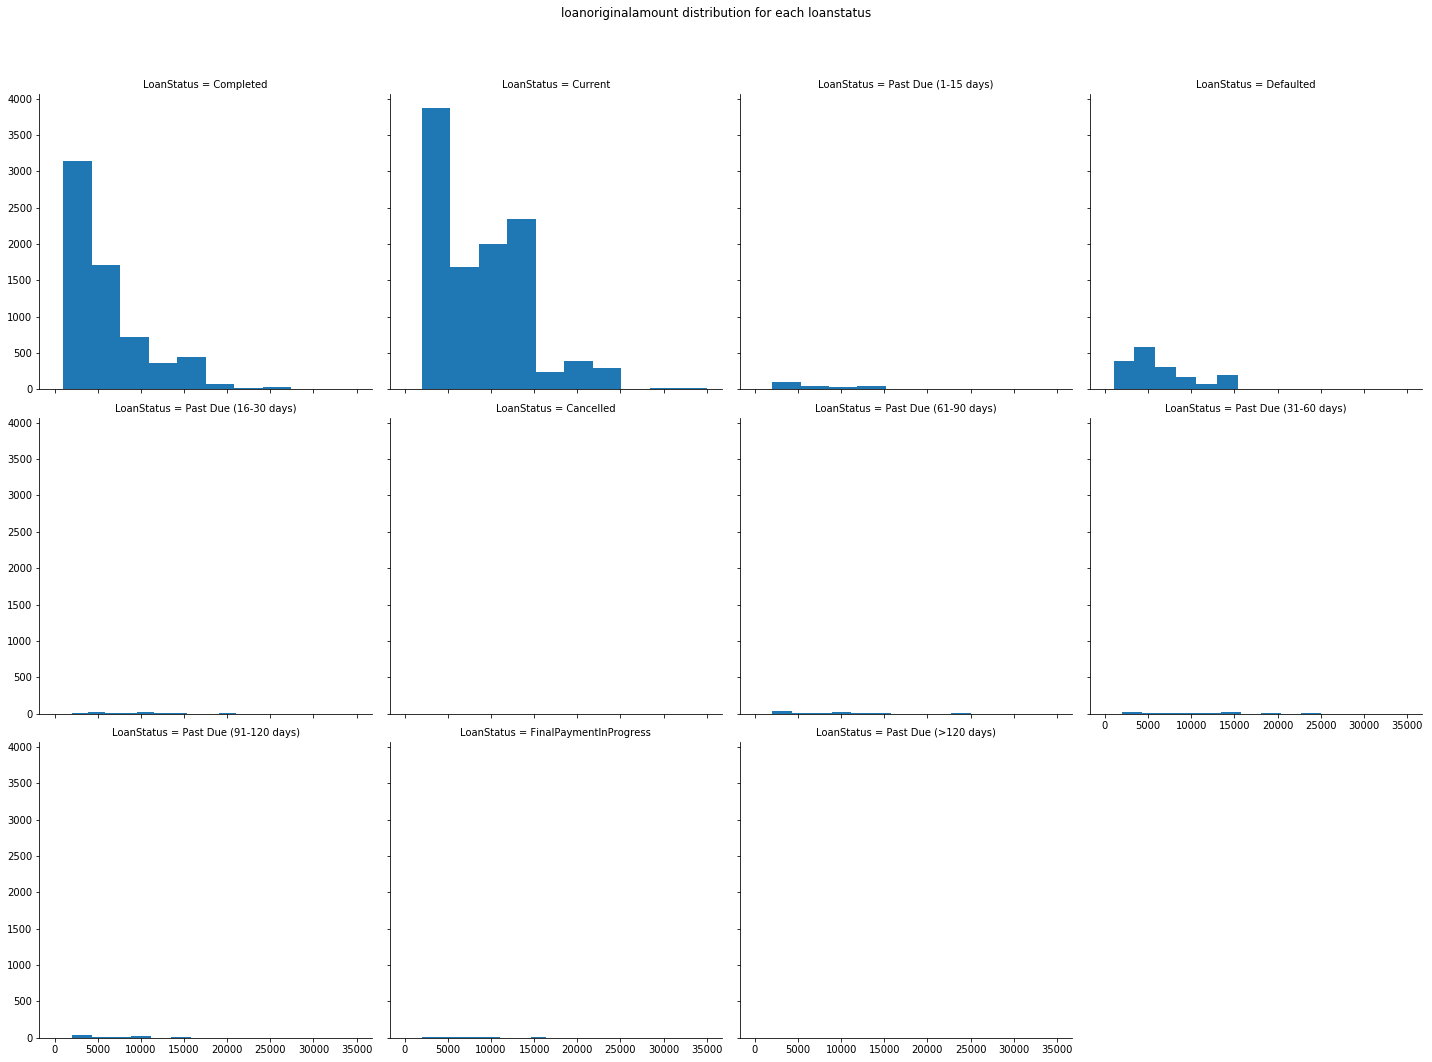

In [61]:
# visualize loanstatus with loanoriginalamount
g = sb.FacetGrid(dataset, col="LoanStatus",col_wrap = 4, size = 5)
g.map_dataframe(plt.hist, x="LoanOriginalAmount")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('loanoriginalamount distribution for each loanstatus')

#### we notice here that for completed loans it is a right skewed 
#### we notice also that defulted customers each one of them took a loans that is less than 1000 dollars
#### we notice that all people that tooke a loans more than 1000 dollars either completed their loans or still pay but don`t pay late

Text(0.5, 1.0, 'ProsperScore and MonthlyLoanPayment')

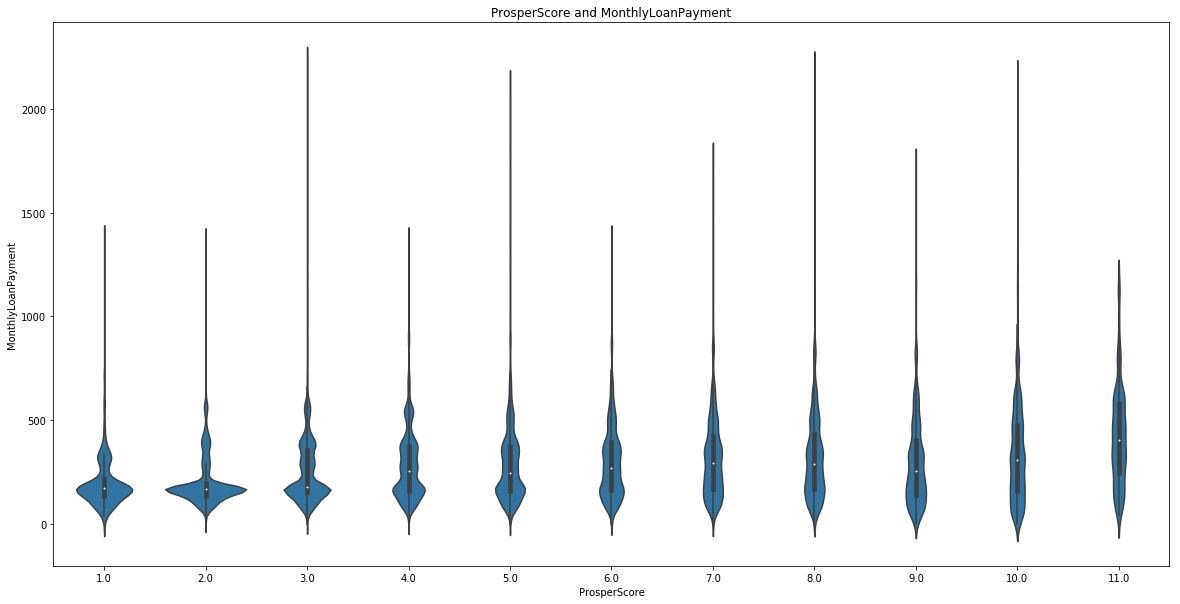

In [62]:
# visualize ProsperScore and MonthlyLoanPayment
fig, ax = plt.subplots(figsize=(20,10))
base_color = sb.color_palette()[0]
sb.violinplot(data = dataset, x = 'ProsperScore', y = 'MonthlyLoanPayment',
              color = base_color)
plt.title('ProsperScore and MonthlyLoanPayment')

#### i noticed here that when the properscore increases the mean of monthly mean increase a littile 
#### i noticed also that when the properscore increases the MonthlyLoanPayment be more distributed (take more range of values)  

Text(0.5, 1.0, 'number of each LoanStatus for each EmploymentStatus')

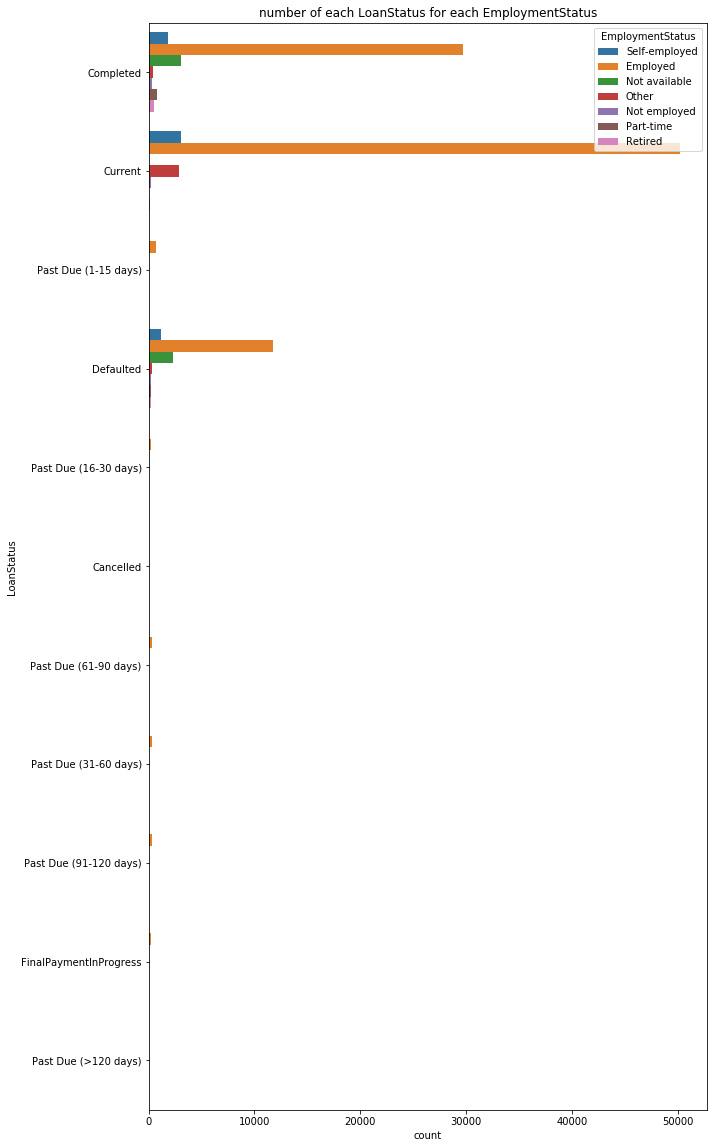

In [63]:
#visualize LoanStatus with EmploymentStatus
plt.figure(figsize = [10, 20])
sb.countplot(data=dataset, y='LoanStatus', hue='EmploymentStatus')
plt.title('number of each LoanStatus for each EmploymentStatus')

#### most of customers that completed or defaulted are employed
#### all retired customers completed their loans
#### all part time customers completed their loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> completed and defaulted loans most of them had a term of 36 months

> for completed loans with LoanOriginalAmount it is a right skewed 

> defulted customers each one of them took a loans that is less than 1000 dollars

> all customers that took a loans more than 1000 dollars either completed their loans or still pay but don`t pay late


> when the properscore increases the mean of monthly mean increase a littile 

> when the properscore increases the MonthlyLoanPayment be more distributed (take more range of values)  


> most of customers that completed or defaulted are employed

> all retired customers completed their loans

> all part time customers completed their loans


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.0, 'heatmap for all features')

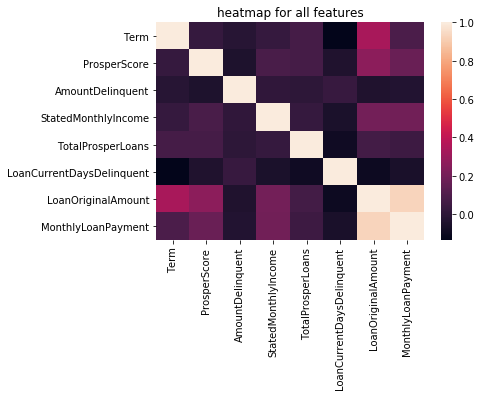

In [64]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sb.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.title('heatmap for all features')

#### we can see here that there is a high correlation between LoanOriginalAmount and MonthlyLoanPayment

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'LoanOriginalAmount and MonthlyLoanPayment for each Term')

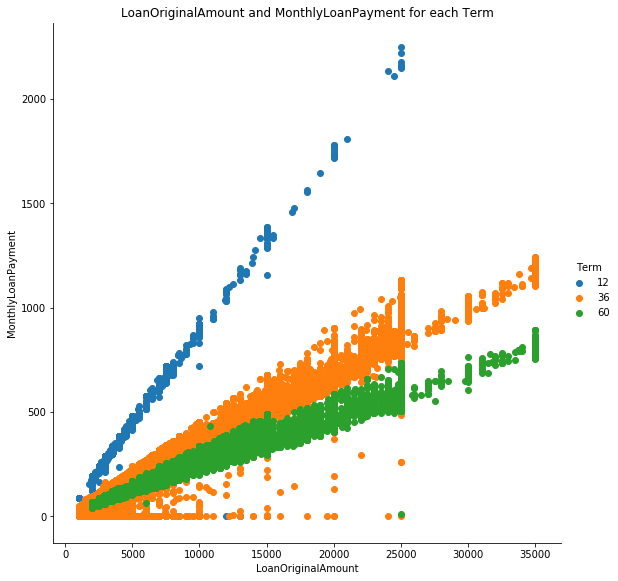

In [65]:
# visualize ('LoanOriginalAmount','MonthlyLoanPayment') for each Term
type_colors = {'12':'#FF5733','36': '#ee99ac', '60': '#7038f8'}

g = sb.FacetGrid(data = dataset, hue = 'Term',size=8)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment')
g.add_legend()
plt.title('LoanOriginalAmount and MonthlyLoanPayment for each Term')

#### it is obvious that there is positive correlation between LoanOriginalAmount and MonthlyLoanPayment
#### we can see here that each term has a line (term 12 months have higher MonthlyLoanPayment )
#### and (term 12 months have lower MonthlyLoanPayment)

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'for each loan range visualize LoanOriginalAmount and AmountDelinquent')

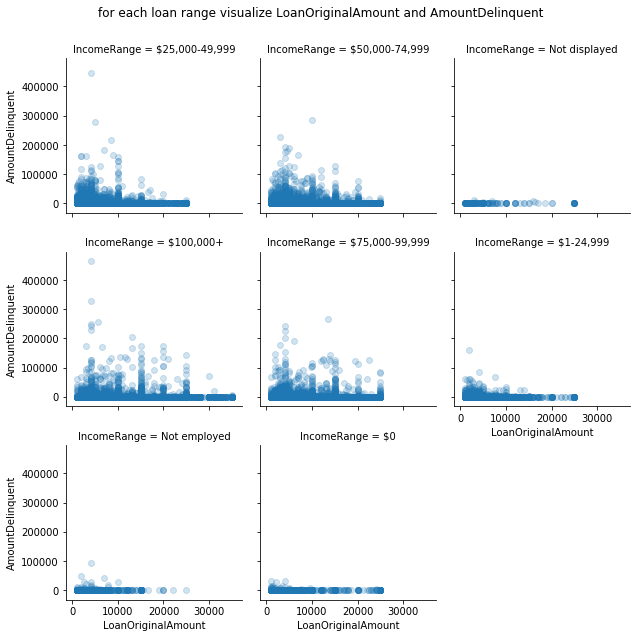

In [66]:
# for each loan range visualize ('LoanOriginalAmount', 'AmountDelinquent')
g = sb.FacetGrid(data = dataset, col = 'IncomeRange', size = 3, col_wrap = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'AmountDelinquent', alpha = 1/5)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('for each loan range visualize LoanOriginalAmount and AmountDelinquent')

#### we con notice here that ( not employed and income range =0 and range from 1 to 24.999 ) have zero amount delinquent 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


> there is a high correlation between LoanOriginalAmount and MonthlyLoanPayment

> there is positive correlation between LoanOriginalAmount and MonthlyLoanPayment

> that each term has a line (term 12 months have higher MonthlyLoanPayment )

> term 12 months have lower MonthlyLoanPayment

### Were there any interesting or surprising interactions between features?

> customers that( not employed and income range = 0 and range from 1 to 24.999 ) have zero amount delinquent 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!